In [1]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib as mns
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import numpy as np

In [2]:
t_data=pd.read_csv('train.csv')
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?



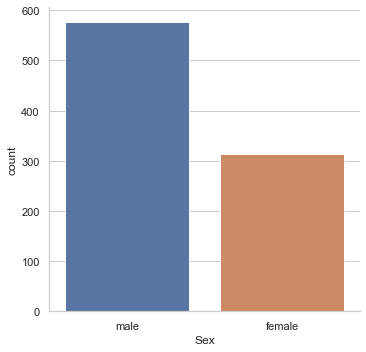

In [3]:
sns.catplot(x='Sex',data=t_data, kind="count")

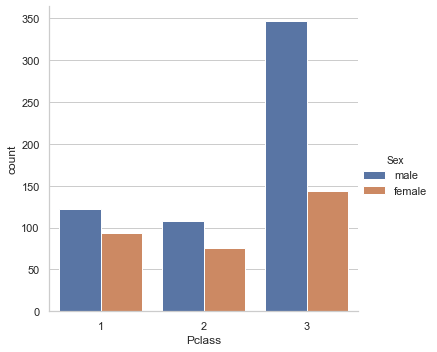

In [4]:
sns.catplot(x='Pclass',hue='Sex',data=t_data,kind='count')

In [5]:
def male_female_child(passenger):
    age,sex=passenger
    
    if age<16:
        return 'child'
    else:
        return sex
    
    
t_data['person']=t_data[['Age','Sex']].apply(male_female_child,axis=1)

t_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


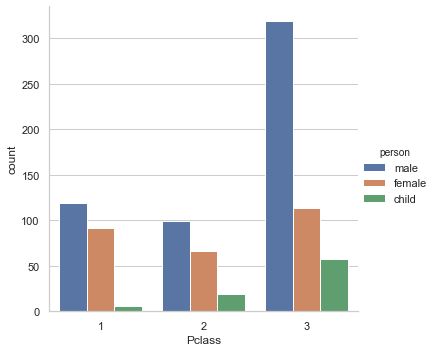

In [6]:
sns.catplot(x='Pclass',hue='person',data=t_data,kind='count')

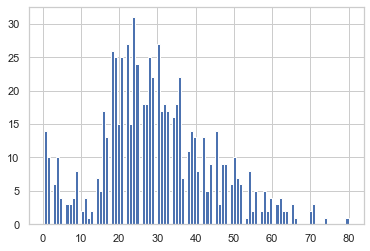

In [7]:
t_data['Age'].hist(bins=100)

In [8]:
t_data['Age'].mean()

29.69911764705882

In [9]:
t_data['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

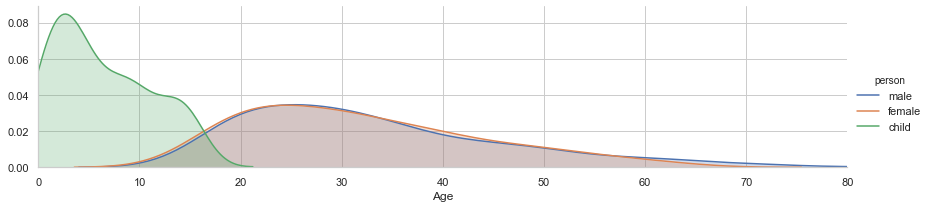

In [13]:
fig=sns.FacetGrid(t_data,hue='person', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest=t_data['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

#### 2.) What deck were the passengers on and how does that relate to their class? 

In [14]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [16]:
deck=t_data['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

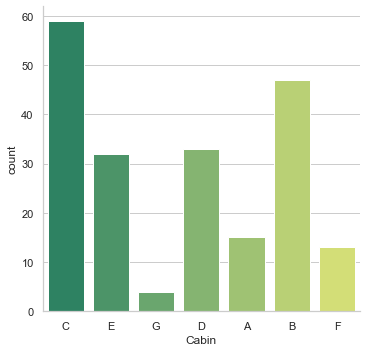

In [65]:
levels=[]
for level in deck:
    levels.append(level[0])

New_cabin=DataFrame(levels)
New_cabin.columns = ['Cabin']
New_cabin=New_cabin[New_cabin['Cabin']!='T']
sns.catplot(x='Cabin', data=New_cabin, palette='summer',kind='count')


#### 3.) Where did the passengers come from?

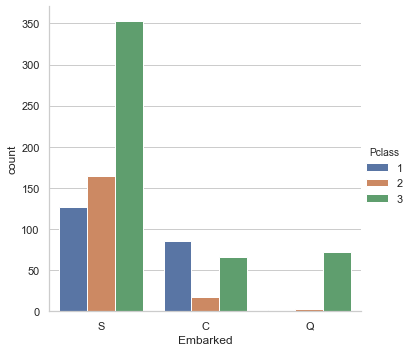

In [71]:
sns.factorplot('Embarked',data=t_data,hue='Pclass',kind='count')

#### 4.) Who was alone and who was with family?

In [72]:
t_data['Alone']=t_data['SibSp']+t_data['Parch']

In [74]:
t_data['Alone'].loc[t_data['Alone']>0] = 'With family'

t_data['Alone'].loc[t_data['Alone']==0] = 'Alone'

/Users/jehoiadajackson/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [75]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


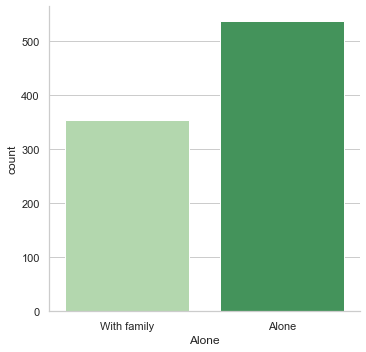

In [81]:
sns.catplot(x='Alone', data=t_data, palette='Greens', kind='count')

#### : 5)What factors helped someone survive the sinking

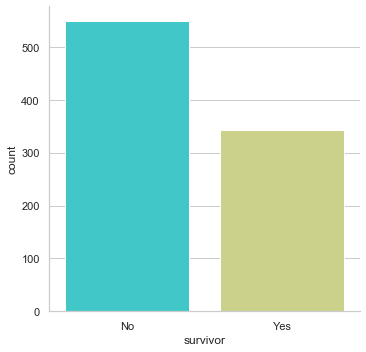

In [111]:
t_data['survivor']=t_data.Survived.map({0:'No',1:'Yes'})
sns.factorplot('survivor',data=t_data, palette='rainbow', kind='count')

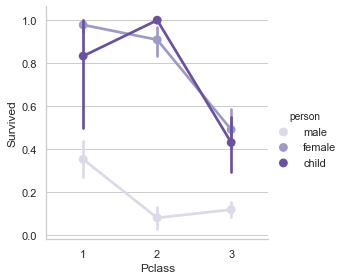

In [115]:
#using class as a factor 

sns.catplot('Pclass','Survived',hue='person', data=t_data,palette='Purples',height=4,kind='point')

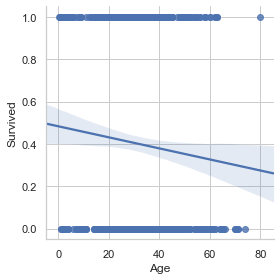

In [119]:
#using Age as a factor 

sns.lmplot('Age','Survived', data=t_data,palette='Purples',height=4)

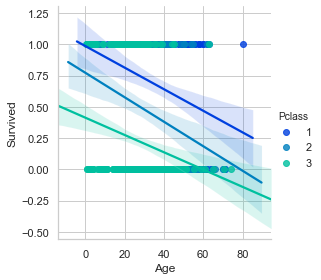

In [128]:
sns.lmplot('Age','Survived',hue='Pclass', data=t_data,palette='winter',height=4)

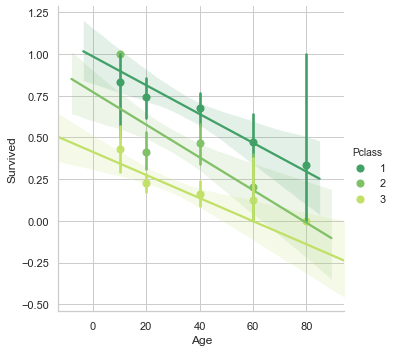

In [129]:
generations=[10,20, 40,60,80]  # using bins to uncluster the x-axis

sns.lmplot('Age', 'Survived', hue='Pclass',data=t_data, x_bins=generations, palette='summer')

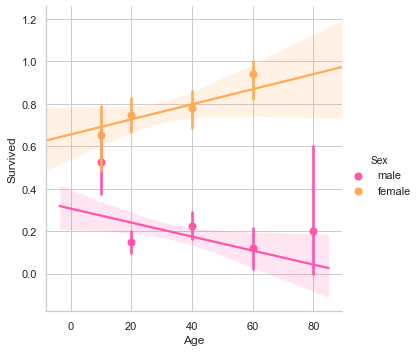

In [135]:
#use gender
sns.lmplot('Age', 'Survived',hue='Sex',data=t_data, palette='spring',x_bins=generations,)

#### 6) Did the deck have an effect on the passengers survival rate

In [162]:
t_data['Carbin']=New_cabin['Cabin']

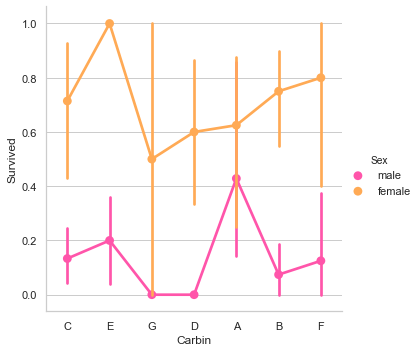

In [184]:
sns.catplot('Carbin', 'Survived',hue='Sex',data=t_data, palette='spring',x_bins=generations,kind='point')

#### 7)Did having a family member increase the odds of surviving the crash?

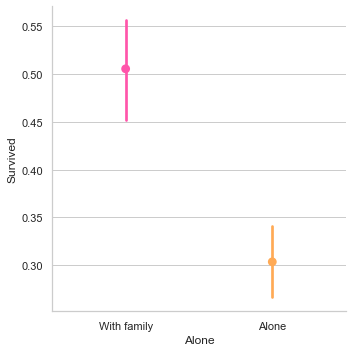

In [188]:
sns.catplot('Alone', 'Survived',data=t_data, palette='spring',x_bins=generations,kind='point')

In [189]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,survivor,Carbin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,No,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,Yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No,C
